In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.decomposition import PCA

# 1. 変数定義

In [2]:
# カレントフォルダ
forlder_cur = os.getcwd()
print(" forlder_cur : {}".format(forlder_cur))
print(" isdir:{}".format(os.path.isdir(forlder_cur)))

# data格納先
folder_data = os.path.join(forlder_cur , "data")
print(" folder_data : {}".format(folder_data))
print(" isdir:{}".format(os.path.isdir(folder_data)))

# dataファイル

## train.csv
fpath_train = os.path.join(folder_data , "train.csv")
print(" fpath_train : {}".format(fpath_train))
print(" isdir:{}".format(os.path.isfile(fpath_train)))

## test.csv
fpath_test = os.path.join(folder_data , "test.csv")
print(" fpath_test : {}".format(fpath_test))
print(" isdir:{}".format(os.path.isfile(fpath_test)))

# id
id_col = "PassengerId"

# 目的変数
target_col = "Survived"

 forlder_cur : /Users/hoshino_takayoshi/Desktop/01_Qiita/01_article/03_pca_titanic
 isdir:True
 folder_data : /Users/hoshino_takayoshi/Desktop/01_Qiita/01_article/03_pca_titanic/data
 isdir:True
 fpath_train : /Users/hoshino_takayoshi/Desktop/01_Qiita/01_article/03_pca_titanic/data/train.csv
 isdir:True
 fpath_test : /Users/hoshino_takayoshi/Desktop/01_Qiita/01_article/03_pca_titanic/data/test.csv
 isdir:True


# 2. data import
output :
- train_data
- test_data
- all_data

In [3]:
# train.csv
train_data = pd.read_csv(fpath_train)
print("train_data :")
print("n = {}".format(len(train_data)))
display(train_data.head())

# test.csv
test_data = pd.read_csv(fpath_test)
print("test_data :")
print("n = {}".format(len(test_data)))
display(test_data.head())

# train_and_test
col_list = list(train_data.columns)
tmp_test = test_data.assign(Survived=None)
tmp_test = tmp_test[col_list].copy()
print("tmp_test :")
print("n = {}".format(len(tmp_test)))
display(tmp_test.head())

all_data = pd.concat([train_data , tmp_test] , axis=0)
print("all_data :")
print("n = {}".format(len(all_data)))
display(all_data.head())

train_data :
n = 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


test_data :
n = 418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


tmp_test :
n = 418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,None,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,None,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,None,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,None,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,None,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


all_data :
n = 1309


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. 前処理
output : 
- proc_all_data

In [4]:
# コピー
proc_all_data = all_data.copy()

# Sex -------------------------------------------------------------------------
col = "Sex"

def app_sex(x):
    if x == "male":
        return 1
    elif x == 'female':
        return 0
    # 欠損
    else:
        return 0.5
proc_all_data[col] = proc_all_data[col].apply(app_sex)

print("columns:{}".format(col) , "-" * 40)
display(all_data[col].value_counts())
display(proc_all_data[col].value_counts())
print("n of missing :" , len(proc_all_data.query("{0} != {0}".format(col))))

# Age -------------------------------------------------------------------------
col = "Age"

medi = proc_all_data[col].median()
proc_all_data[col] = proc_all_data[col].fillna(medi)

print("columns:{}".format(col) , "-" * 40)
display(all_data[col].value_counts())
display(proc_all_data[col].value_counts())
print("n of missing :" , len(proc_all_data.query("{0} != {0}".format(col))))
print("median :" , medi)

# Fare -------------------------------------------------------------------------
col = "Fare"

medi = proc_all_data[col].median()
proc_all_data[col] = proc_all_data[col].fillna(medi)

print("columns:{}".format(col) , "-" * 40)
display(all_data[col].value_counts())
display(proc_all_data[col].value_counts())
print("n of missing :" , len(proc_all_data.query("{0} != {0}".format(col))))
print("median :" , medi)

# Embarked -------------------------------------------------------------------------
col = "Embarked"

proc_all_data = pd.get_dummies(proc_all_data , columns=[col])

print("columns:{}".format(col) , "-" * 40)
display(all_data.head())
display(proc_all_data.head())

# Cabin -------------------------------------------------------------------------
col = "Cabin"

proc_all_data = proc_all_data.drop(columns=[col])

print("columns:{}".format(col) , "-" * 40)
display(all_data.head())
display(proc_all_data.head())

# Ticket -------------------------------------------------------------------------
col = "Ticket"

proc_all_data = proc_all_data.drop(columns=[col])

print("columns:{}".format(col) , "-" * 40)
display(all_data.head())
display(proc_all_data.head())

# Name -------------------------------------------------------------------------
col = "Name"

proc_all_data = proc_all_data.drop(columns=[col])

print("columns:{}".format(col) , "-" * 40)
display(all_data.head())
display(proc_all_data.head())

columns:Sex ----------------------------------------


male      843
female    466
Name: Sex, dtype: int64

1    843
0    466
Name: Sex, dtype: int64

n of missing : 0
columns:Age ----------------------------------------


24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
76.00     1
22.50     1
74.00     1
80.00     1
0.67      1
Name: Age, Length: 98, dtype: int64

28.00    295
24.00     47
22.00     43
21.00     41
30.00     40
        ... 
76.00      1
22.50      1
74.00      1
80.00      1
0.67       1
Name: Age, Length: 98, dtype: int64

n of missing : 0
median : 28.0
columns:Fare ----------------------------------------


8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

n of missing : 0
median : 14.4542
columns:Embarked ----------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


columns:Cabin ----------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


columns:Ticket ----------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,0,1


columns:Name ----------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


# 4. 主成分分析

In [5]:
# 説明変数
feature_cols = list(set(proc_all_data.columns) - set([target_col]) - set([id_col]))
print("feature_cols :" , feature_cols)
print("len of feature_cols :" , len(feature_cols))

features = proc_all_data[feature_cols]

pca = PCA()
pca.fit(features)

print("主成分数 : " , pca.n_components_)
print("寄与率 : " , ["{:.2f}".format(ratio) for ratio in pca.explained_variance_ratio_])


feature_cols : ['Embarked_Q', 'Parch', 'Sex', 'Embarked_C', 'Pclass', 'Fare', 'SibSp', 'Embarked_S', 'Age']
len of feature_cols : 9
主成分数 :  9
寄与率 :  ['0.94', '0.06', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']


# 5. 第一主成分
check contents :
- 固有ベクトル
- 因子負荷量

### 5-1. 固有ベクトル

In [6]:
# 固有ベクトル(第一主成分)

components_df = pd.DataFrame({
    "feature":feature_cols
    , "component":pca.components_[0]
})
components_df["abs_component"] = components_df["component"].abs()
components_df["rank_component"] = components_df["abs_component"].rank(ascending=False)

# ベクトル値の絶対値で降順ソート
components_df.sort_values(by="abs_component" , ascending=False , inplace=True)
display(components_df)

,feature,component,abs_component,rank_component
5,Fare,0.998825,0.998825,1.0
8,Age,0.047232,0.047232,2.0
4,Pclass,-0.009090,0.009090,3.0
1,Parch,0.003672,0.003672,4.0
6,SibSp,0.003174,0.003174,5.0
3,Embarked_C,0.002240,0.002240,6.0
2,Sex,-0.001708,0.001708,7.0
7,Embarked_S,-0.001534,0.001534,8.0
0,Embarked_Q,-0.000733,0.000733,9.0


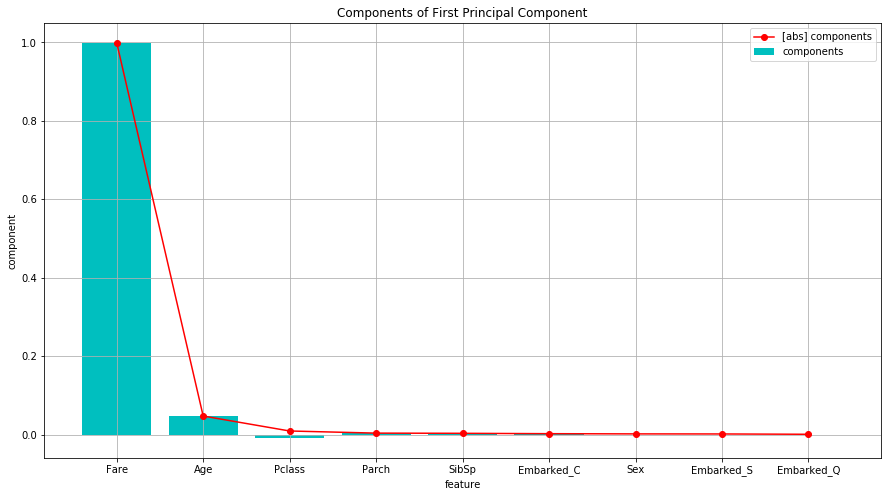

In [7]:
# グラフ作成
max_abs_component = max(components_df["abs_component"])
min_component = min(components_df["component"])
x_ticks_num = list(i for i in range(len(components_df)))

fig = plt.figure(figsize=(15,8))

plt.grid()
plt.title("Components of First Principal Component")
plt.xlabel("feature")
plt.ylabel("component")
plt.xticks(ticks=x_ticks_num , labels=components_df["feature"])

plt.bar(x_ticks_num , components_df["component"] , color="c" , label="components")
plt.plot(x_ticks_num , components_df["abs_component"] , color="r" , marker="o" , label="[abs] components")

plt.legend()

plt.show()


In [8]:
# 画像保存
fig.savefig("graph_components.png")

### 5-2. 因子負荷量

In [9]:
# 主成分得点(第一主成分)
score = pca.transform(features)[: , 0]

# 因子負荷量
dict_fact_load = dict()
for col in feature_cols:
    data = features[col]
    factor_loading = data.corr(pd.Series(score))
    dict_fact_load[col] = factor_loading

fact_load_df = pd.DataFrame({
    "feature":feature_cols
    , "factor_loading":[dict_fact_load[col] for col in feature_cols]
})
fact_load_df["abs_factor_loading"] = fact_load_df["factor_loading"].abs()
fact_load_df["rank_factor_loading"] = fact_load_df["abs_factor_loading"].rank(ascending=False)

# ベクトル値の絶対値で降順ソート
fact_load_df.sort_values(by="abs_factor_loading" , ascending=False , inplace=True)
display(fact_load_df)

,feature,factor_loading,abs_factor_loading,rank_factor_loading
5,Fare,0.639913,0.639913,1.0
4,Pclass,-0.366652,0.366652,2.0
3,Embarked_C,0.179698,0.179698,3.0
1,Parch,0.113850,0.113850,4.0
7,Embarked_S,-0.109342,0.109342,5.0
2,Sex,-0.103544,0.103544,6.0
6,SibSp,0.097725,0.097725,7.0
0,Embarked_Q,-0.082320,0.082320,8.0
8,Age,0.068697,0.068697,9.0


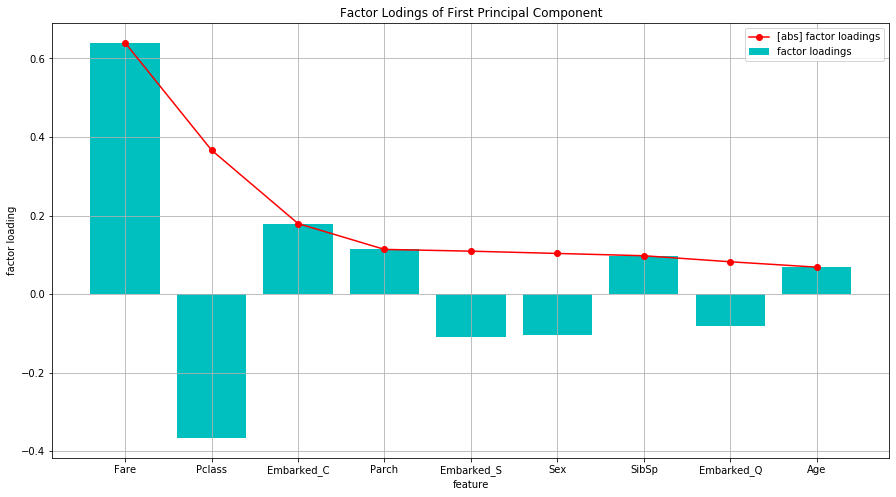

In [10]:
# グラフ作成
max_abs_factor_loading = max(fact_load_df["abs_factor_loading"])
min_factor_loading = min(fact_load_df["factor_loading"])
x_ticks_num = list(i for i in range(len(fact_load_df)))

plt.figure(figsize=(15,8))

plt.grid()
plt.title("Factor Lodings of First Principal Component")
plt.xlabel("feature")
plt.ylabel("factor loading")
plt.xticks(ticks=x_ticks_num , labels=fact_load_df["feature"])

plt.bar(x_ticks_num , fact_load_df["factor_loading"] , color="c" , label="factor loadings")
plt.plot(x_ticks_num , fact_load_df["abs_factor_loading"] , color="r" , marker="o" , label="[abs] factor loadings")

plt.legend()

plt.show()


In [11]:
# 画像保存
fig.savefig("graph_factor_loadings.png")